# This Big O: a review of the notation through sorting

**Frederico Muñoz**

<center><img src="./hacf_doherty.png"/></center>

> Mother Mary...396 milliseconds!
> 
> JOE: Are you sure you ran it right?
> 
> Checked it three times.
> 
> GORDON: Donna, we just hit the Doherty Threshold.
> 
> JOE: Today, we hit a milestone. When engineers measure the speed of a PC, they talk about something called the "Doherty Threshold of System Response Time." It sounds fancy, I know, but, basically, what it means is when you ask your computer to do something and hit the enter key, if it answers you back in less than 400 milliseconds, just under half a second, then you will stay glued to that machine for hours. Your eyes may glaze over, but your productivity will soar. You'll be transfixed, mesmerized. Even a slight deviation back to half a second response time will allow your attention to stray. You'll get up and do the dishes, pick up the remote, watch the game. _But under 400 milliseconds, ah, that's the sweet spot_.

I was recently reminded of the [Doherty Threshold](https://lawsofux.com/doherty-threshold/) while rewatching "Halt and Catch Fire", a perennial favourite of mine in terms of tech-adjacent TV series: this 400ms threshold that affects user experience.

At the same time, I was rereading [Steve Yegge's self-described rant](https://sites.google.com/site/steveyegge2/what-you-need-to-know) - also no spring chicken, as far as blog posts go - and specifically:

> Algorithms can be analyzed for their space and time performance, which is expressed in a semi-formal "big-O" notation.
> Space and time are usually involved in a tradeoff, where you must optimize for one or the other.
> A balanced binary tree has O(log n) performance on its insert and find operations.
> Exponential big-O performance is really bad.
> Imperative programming (C/C++/Java/Perl) is not the only programming model out there, nor is it going to last much longer (in the grand 400-year Scheme of things, if you didn't catch the hint the first time). Imperative languages are just syntax for Von Neumann machine operations.

This combination of UX necessity (Doherty) and engineering reality (Yegge) made me wonder...

* Did I still remember Big-O notation? Yes, but some of the details are fuzzier than they should.
* Does this make a difference in today's "cloud native" work? Obviously since it doesn't change the fundamental aspects of programming, but how could it be perceived? And measured?
* Can I explain it?
* Is it possible to show it in different ways?

Richard Feynman (or Einstein, or both, or none of them, depending on who you ask) said something [if you can't explain something in simple terms, you don't really understand it](https://subjectguides.york.ac.uk/study-revision/feynman-technique): this is my attempt at doing that using two common sorting algorithms, Bubble and Merge sort.

**NB: while I'll try my best to achieve a balance between correctness and simplicity, I may fail one way or the other: some aspects on the math behind this can be excessively detailed for some, and lack rigour for others.**

## Big-O notation: speed and sizes

Before benchmarking our sorting algorithms, we need a language to describe how "hard" an algorithm has to work: that language is, in simple terms, Big-O Notation.

Big-O doesn't measure speed in seconds (because that depends on hardware and other factors): instead, it measures *growth rate*: if I double the number of items in my list ($N$), how many more operations does the computer have to do? 

Before going deeper, it’s important to clarify what Big-O notation _is not_:

* **Big-O is not the actual running time on your computer**: Big-O says nothing about the number of milliseconds something takes, how fast it runs on your laptop vs. someone else’s, etc: it only tells us how the running time grows as input becomes large.

* **Big-O is not a detailed performance metric**: for example, two algorithms with the same Big-O (e.g. both O(n log n)) can differ in speed by large constant factors: Big-O deliberately ignores those constant details, the focus is on long-term scaling.

* **Big-O is not always "worst-case"**: when we use Big-O notation (O($n^{2}$) etc), *we are almost always referring to the worst-case scenario*. This gives us something like 'No matter how unlucky we get with the input data, the program will never take longer than this upper limit.' That being said, Big-O is just a mathematical tool for describing an _upper bound_, and you could theoretically use Big-O to describe an average case or best case; to avoid confusion, most computer scientists use Big-O for worst-case only, and use other symbols like "Big-Theta" ($\Theta$) when they want to talk about average performance guarantees, or $\Omega$ for the best case.

* **Big-O is not about "lines of code"**: It's more about basic operations (comparisons, swaps, multiplications) and how they scale with input size, and less about the length of a program: indeed, many times the more naïve implementation will be "simpler" from a LOC count perspective, but "worse" from a Big-O complexity one. 

* **Big-O does not predict behavior for small inputs**: complexity notation is asymptotic, it describes growth when n → ∞ ... for small datasets, an $O(n^2)$ algorithm can  beat an O(n log n) one because of constants and overhead.

On this last point, why do we care? Let's see:

* Small datasets ($N < 100$): Almost everything is fast, a "bad" algorithm and a "good" one might both finish in 0.0001 seconds.
* Large datasets ($N > 1,000,000$): This is where Big-O matters, a "bad" algorithm might take years, while a "good" one takes seconds.

I should note that not everything needs to start with a "good" algorithm: often, *it's perfectly fine (even better) to start with something that works, and then move to other data structures or algorithms if needed*. Paul Graham mentions this in [ANSI Common Lisp](https://www.goodreads.com/book/show/41801.ANSI_Common_Lisp):

>The development of Lisp programs often echoes the development of Lisp itself. In the initial version of a Lisp program, you may use a lot of lists.Then in later versions you may switch to faster, specialized data structures.

One can start prototyping with lists, then move to e.g. hash tables later (especially if the operations are abstracted in functions or methods). 

Back to Big-O, here is how the different complexities look like:


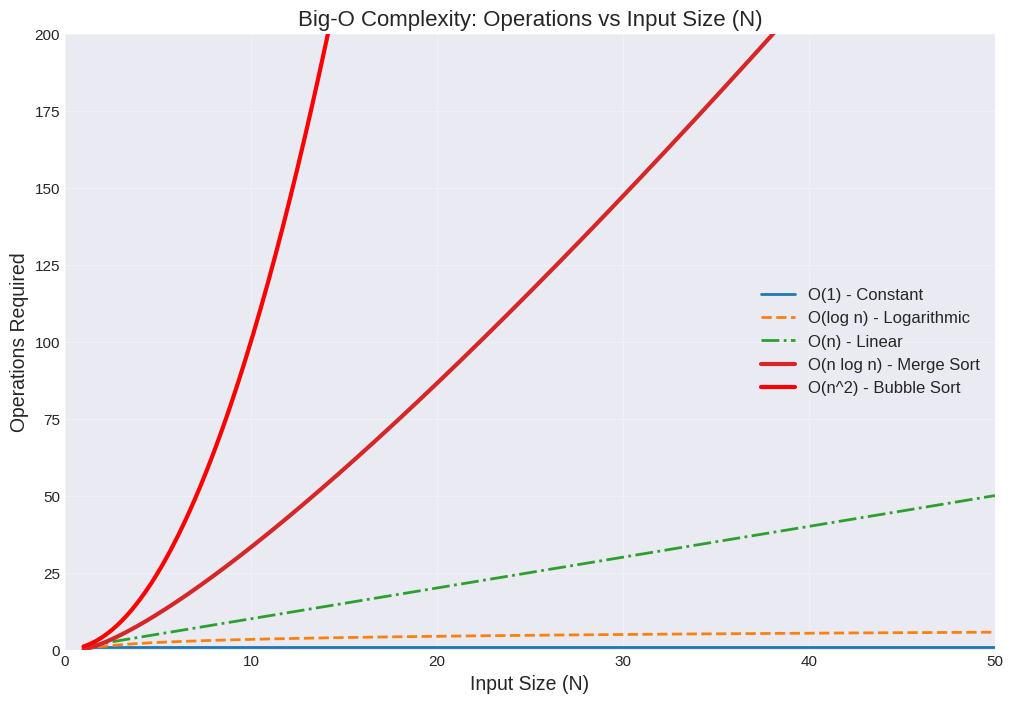

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Setup the data
N = np.linspace(1, 50, 500) # Input size from 1 to 50

# Calculate the different complexities
y_1 = np.ones_like(N)             # O(1) Constant
y_log = np.log2(N)                # O(log n) Logarithmic
y_n = N                           # O(n) Linear
y_nlog = N * np.log2(N)           # O(n log n) Log-Linear (our Merge Sort)
y_n2 = N**2                       # O(n^2) Quadratic (our Bubble Sort)

# Plot things
plt.figure(figsize=(12, 8))
plt.ylim(0, 200) 
plt.xlim(0, 50)

plt.plot(N, y_1, label='O(1) - Constant', linestyle='-', linewidth=2)
plt.plot(N, y_log, label='O(log n) - Logarithmic', linestyle='--', linewidth=2)
plt.plot(N, y_n, label='O(n) - Linear', linestyle='-.', linewidth=2)
plt.plot(N, y_nlog, label='O(n log n) - Merge Sort', linestyle='-', linewidth=3)
plt.plot(N, y_n2, label='O(n^2) - Bubble Sort', linestyle='-', linewidth=3, color='red')

# Add some styling
plt.title("Big-O Complexity: Operations vs Input Size (N)", fontsize=16)
plt.xlabel("Input Size (N)", fontsize=14)
plt.ylabel("Operations Required", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.show()

Here is an attempt at explaining what this means in practice:

1. **$O(1)$ - Constant Time**
   * Graph: A flat line.
   * Behavior: The size of the data doesn't matter, it takes the same amount of time to do it for 1 item or 1 billion items. 
   * Examples:
     - Accessing an array index, e.g. `arr[5]`
     - Dictionary (Hash Map) lookups, on average.
     - Appending to the end of a list (usually, depends on language/implementation).
2. **$O(\log n)$ - Logarithmic Time**
   * Graph: Rises slightly, then flattens out.
   * Behavior: Very efficient,every time$N$ doubles, the work only increases by 1 unit.
   * Examples:
     - Binary Search: Finding a number in a sorted phone book.
     - Finding an element in a balanced [Binary Search Tree](https://en.wikipedia.org/wiki/Binary_search_tree).
3. **$O(n)$ - Linear Time**
   * Graph: A straight diagonal line.
   * Behavior: Very predicatable and, well, linear:  double the input, double the work.
   * Examples:
     - For Loops: Iterating through a list.
     - Finding the max/min value in an unsorted list.
4. **$O(n \log n)$ - Log-Linear Time (Merge Sort)**
   * Graph: Slightly steeper than Linear.
   * Behavior: It is slightly slower than just reading the list ($O(n)$), but much faster than comparing everything to everything. Why? As we will see in the trace, we iterate through the list ($n$) once per level of the recursion tree, which has a height ($\log n$).
5. **$O(n^2)$ - Quadratic Time (Bubble Sort)**
   * Graph: A line that shoots straight up.
   * Behavior: If you double the input, the work quadruples ($2^2 = 4$).N = 10 -> 100 operations, N = 1,000 -> 1,000,000 operations, etc. Good for small sets (under 50 items) because it's simple to code and has low overhead, but catastrophic for large sets.
   * Examples:
     - Nested loops (loop inside a loop).
     - Bubble Sort, Insertion Sort, Selection Sort.



## Sorting Algorithms: BubbleSort vs. MergeSort

Now that we understand the *notation*, let's see it in action with two classic sorting algorithms that perfectly illustrate the difference between O(n²) and O(n log n).

### Bubble Sort: the simple approach

**How it works:** Walk through the array comparing adjacent pairs. If they're out of order, swap them. Repeat until no swaps are needed.

Think of it like bubbles rising in water: the largest elements "float" to the end of the array with each pass.

```
Pass 1: [64, 34, 25, 12] → compare 64>34? swap → [34, 64, 25, 12] → compare 64>25? swap → ...
Pass 2: [34, 25, 12, 64] → the 64 is now in place, repeat for remaining elements
...
```

**Why O(n²)?** We need roughly N passes through the array, and each pass examines up to N elements. N × N = N².

### Merge Sort: divide and conquer

**How it works:** Split the array in half, recursively sort each half, then merge the sorted halves back together.

A fundamental aspect that makes this work:: an array of 1 element is *already sorted*! So we keep dividing until we have single elements, then merge them back in sorted order.

```
[64, 34, 25, 12] → split
    [64, 34] and [25, 12] → split again
        [64] [34] and [25] [12] → all single elements (sorted!)
        merge [34, 64] and merge [12, 25]
    merge → [12, 25, 34, 64]
```

**Why O(n log n)?** We divide the array log₂(n) times (halving each time), and each level of merging examines all n elements once. log(n) × n = n log n. This is something that can be generalised: many algorithms repeatedly divide the problem in half:

* Mergesort splits the list in half
* Binary search cuts the search interval in half
* Balanced trees divide the search space at each level

Every time you cut something in half, you reduce its size n → n/2 → n/4 → n/8 → ... → 1, and this can only be done about log₂(n) times: the “log n” term usually represents the number of levels in a "divide-and-conquer" approach, the number of times we can *recursively split the sequence in half*, while the "n" represents the work done at each "level".

### The Key Difference

For an array of 7 elements:
- **Bubble Sort:** ~6 passes × ~6 comparisons per pass ≈ **36 operations**
- **Merge Sort:** ~3 levels × ~7 comparisons per level ≈ **21 operations**



The gap grows dramatically with larger arrays. Let's see this in action: the following code traces the operation of each sorting algorithm. Take a look at the output:

In [8]:
# Step-by-step visualization versions
# Created to print the steps and allow tracking of the operations

def bubble_sort_visual(arr, verbose=True):
    """
    Bubble Sort with step-by-step visualization.
    Shows each pass and tracks comparisons/swaps.
    """
    result = arr.copy()
    n = len(result)
    total_comparisons = 0
    total_swaps = 0
    
    if verbose:
        print(f"Bubble Sort on {arr}")
        print("=" * 50)
    
    for i in range(n):
        swapped = False
        pass_comparisons = 0
        pass_swaps = 0
        initial_state = result.copy()
        
        for j in range(n - i - 1):
            pass_comparisons += 1
            total_comparisons += 1
            if result[j] > result[j + 1]:
                result[j], result[j + 1] = result[j + 1], result[j]
                swapped = True
                pass_swaps += 1
                total_swaps += 1
        
        if verbose:
            print(f"Pass {i+1}: {initial_state} -> {result}")
            print(f"         ({pass_comparisons} comparisons, {pass_swaps} swaps)")
        
        if not swapped:
            if verbose:
                print(f"         No swaps needed - array is sorted!")
            break
    
    if verbose:
        print("-" * 50)
        print(f"TOTAL: {i+1} passes, {total_comparisons} comparisons, {total_swaps} swaps")
        print(f"Result: {result}\n")
    
    return result, total_comparisons


def merge_sort_visual(arr, depth=0, verbose=True):
    """
    Merge Sort with step-by-step visualization.
    Shows the divide-and-conquer tree structure.
    """
    indent = "  " * depth
    
    if len(arr) <= 1:
        if verbose and depth > 0:
            print(f"{indent}[{arr[0] if arr else ''}] (base case)")
        return arr.copy(), 0
    
    if verbose:
        print(f"{indent}Divide: {arr}")
    
    mid = len(arr) // 2
    left, left_comps = merge_sort_visual(arr[:mid], depth + 1, verbose)
    right, right_comps = merge_sort_visual(arr[mid:], depth + 1, verbose)
    
    # Merge with comparison counting
    merged = []
    i = j = 0
    merge_comparisons = 0
    
    while i < len(left) and j < len(right):
        merge_comparisons += 1
        if left[i] <= right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            j += 1
    
    merged.extend(left[i:])
    merged.extend(right[j:])
    
    total_comps = left_comps + right_comps + merge_comparisons
    
    if verbose:
        print(f"{indent}Merge: {left} + {right} -> {merged} ({merge_comparisons} comparisons)")
    
    return merged, total_comps


# Standard implementations (no output, for benchmarking)

def bubble_sort(arr):
    """Bubble Sort - O(n^2) complexity"""
    result = arr.copy()
    n = len(result)
    for i in range(n):
        swapped = False
        for j in range(n - i - 1):
            if result[j] > result[j + 1]:
                result[j], result[j + 1] = result[j + 1], result[j]
                swapped = True
        if not swapped:
            break
    return result


def merge_sort(arr):
    """Merge Sort - O(n log n) complexity"""
    if len(arr) <= 1:
        return arr.copy()
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)


def merge(left, right):
    """Merge two sorted arrays."""
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result


# Run the visual demonstration
print("=" * 60)
print("STEP-BY-STEP COMPARISON")
print("=" * 60)

test_array = [64, 34, 25, 12, 22, 11, 90]

print("\n### BUBBLE SORT ###\n")
bubble_result, bubble_comparisons = bubble_sort_visual(test_array)

print("\n### MERGE SORT ###\n")
print(f"Merge Sort on {test_array}")
print("=" * 50)
merge_result, merge_comparisons = merge_sort_visual(test_array)
print("-" * 50)
print(f"TOTAL: {merge_comparisons} comparisons")
print(f"Result: {merge_result}\n")

# Summary comparing both
print("=" * 60)
print("COMPARISON SUMMARY")
print("=" * 60)
print(f"Array size: {len(test_array)} elements")
print(f"Bubble Sort: {bubble_comparisons} comparisons")
print(f"Merge Sort:  {merge_comparisons} comparisons")
print(f"Difference:  Bubble Sort used {bubble_comparisons - merge_comparisons} MORE comparisons")
print(f"             ({bubble_comparisons / merge_comparisons:.1f}x as many)")
print()


STEP-BY-STEP COMPARISON

### BUBBLE SORT ###

Bubble Sort on [64, 34, 25, 12, 22, 11, 90]
Pass 1: [64, 34, 25, 12, 22, 11, 90] -> [34, 25, 12, 22, 11, 64, 90]
         (6 comparisons, 5 swaps)
Pass 2: [34, 25, 12, 22, 11, 64, 90] -> [25, 12, 22, 11, 34, 64, 90]
         (5 comparisons, 4 swaps)
Pass 3: [25, 12, 22, 11, 34, 64, 90] -> [12, 22, 11, 25, 34, 64, 90]
         (4 comparisons, 3 swaps)
Pass 4: [12, 22, 11, 25, 34, 64, 90] -> [12, 11, 22, 25, 34, 64, 90]
         (3 comparisons, 1 swaps)
Pass 5: [12, 11, 22, 25, 34, 64, 90] -> [11, 12, 22, 25, 34, 64, 90]
         (2 comparisons, 1 swaps)
Pass 6: [11, 12, 22, 25, 34, 64, 90] -> [11, 12, 22, 25, 34, 64, 90]
         (1 comparisons, 0 swaps)
         No swaps needed - array is sorted!
--------------------------------------------------
TOTAL: 6 passes, 21 comparisons, 14 swaps
Result: [11, 12, 22, 25, 34, 64, 90]


### MERGE SORT ###

Merge Sort on [64, 34, 25, 12, 22, 11, 90]
Divide: [64, 34, 25, 12, 22, 11, 90]
  Divide: [64, 3

Note how the results for Merge Sort match what we said earlier about the meaning of $n \log n$:

* The input `[64, 34, 25, 12, 22, 11, 90]` has **7 elements**.
* $\log_2(7) = 2.8074 \approx 3$. Since 7 is not a power of two, we round up and the sequence will be split across **3 levels**:
  - Level 1: `[64, 34, 25]` and `[12, 22, 11, 90]`  
  - Level 2: `[64, 34]` and `[25]` ; `[12, 22]` and `[11, 90]`  
  - Level 3: `[64]` and `[34]` ; `[25]` ; `[12]` and `[22]` ; `[11]` and `[90]`

At each level, all elements participate in the merging step, so each level performs roughly **6–7 merge comparisons**.

In this tiny example, the actual number of comparisons performed is **14**, whereas the theoretical estimate is:

$$
7 \cdot \log_2(7) \approx 7 \cdot 2.8 \approx 19.6
$$

They are not identical, but they are in the same **theoretical ballpark**: Big-O describes how running time **scales**, not the exact number of operations for a specific small input. In other words, $O(n \log n)$ is an **asymptotic upper bound**.

Bubble Sort makes this contrast even clearer: we measure **21 comparisons**, yet $O(n^2)$ suggests $7^2 = 49$: again, this is because Big-O gives an **upper bound on growth**, not an exact formula. For small inputs such as the one in our example, the difference is noticeable, but as $n$ grows, the constant factors diminish in importance and the quadratic growth pattern dominates, which is what $O(n^2)$ is meant to convey.


## Showing how Big-O theory matches practice

We've seen that Bubble Sort makes more comparisons than Merge Sort, but does the *growth rate* actually match the theoretical O(n²) vs O(n log n)?

### Curve fitting? Why?

Big-O notation tells us the *shape* of growth, but not the actual time. The formula is:

- **Bubble Sort:** `Time = c₁ × n²` (where c₁ depends on your computer)
- **Merge Sort:** `Time = c₂ × n × log(n)` (where c₂ depends on your computer)

By running benchmarks and fitting curves, we can:

1. **Find the constants** (c₁ and c₂) for this machine
2. **Verify the shape matches** - if R² ≈ 1.0, theory matches reality (it should)
3. **Predict performance** for larger arrays we haven't tested

In other words, we can find the constants and then uses them to make the plots "fit" correctly.

### What the plots show

1. **Actual Performance (Log Scale):** Raw benchmark data, notice how Bubble Sort "curves upward" while Merge Sort stays relatively flat.
2. **Theory vs Reality:** The dashed lines are our fitted theoretical curves; dots are measured data.
3. **Performance Ratio:** How many times slower is Bubble Sort? This grows as arrays get larger
4. **Bar Comparison:** A side-by-side at the largest tested size

### Understanding R² (goodness of fit)

We will use [goodness of fit](https://en.wikipedia.org/wiki/Goodness_of_fit) to validate that the results that we get match the theory (spoiler: they will). You don't have to care about it, essentially just consider that:

- **R² = 1.0** means the theory perfectly predicts measured data
- **R² > 0.95** is excellent - our code behaves exactly as Big-O predicts
- **R² < 0.8** would suggest our implementation doesn't match the expected complexity

We will use [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) for this.

Let's run the benchmarks and see (note that this might take a while).

BENCHMARKING
Array sizes: [100, 500, 1000, 2000, 5000, 10000, 20000]
Trials per size: 2

n=100... Bubble=0.0003s, Merge=0.0001s (2.3x slower)
n=500... Bubble=0.0071s, Merge=0.0005s (14.5x slower)
n=1,000... Bubble=0.0357s, Merge=0.0013s (28.3x slower)
n=2,000... Bubble=0.1406s, Merge=0.0024s (59.0x slower)
n=5,000... Bubble=0.9053s, Merge=0.0069s (132.0x slower)
n=10,000... Bubble=3.7587s, Merge=0.0161s (233.1x slower)
n=20,000... Bubble=15.7073s, Merge=0.0342s (459.1x slower)

Benchmarks complete!

RESULTS SUMMARY
 Array Size  Bubble Sort (s)  Merge Sort (s)  Ratio
        100         0.000319        0.000137   2.3x
        500         0.007113        0.000491  14.5x
       1000         0.035737        0.001264  28.3x
       2000         0.140602        0.002384  59.0x
       5000         0.905260        0.006860 132.0x
      10000         3.758701        0.016122 233.1x
      20000        15.707323        0.034213 459.1x

CURVE FITTING (Validating Big-O)
Bubble Sort: T(n) = n^2 / 2.5

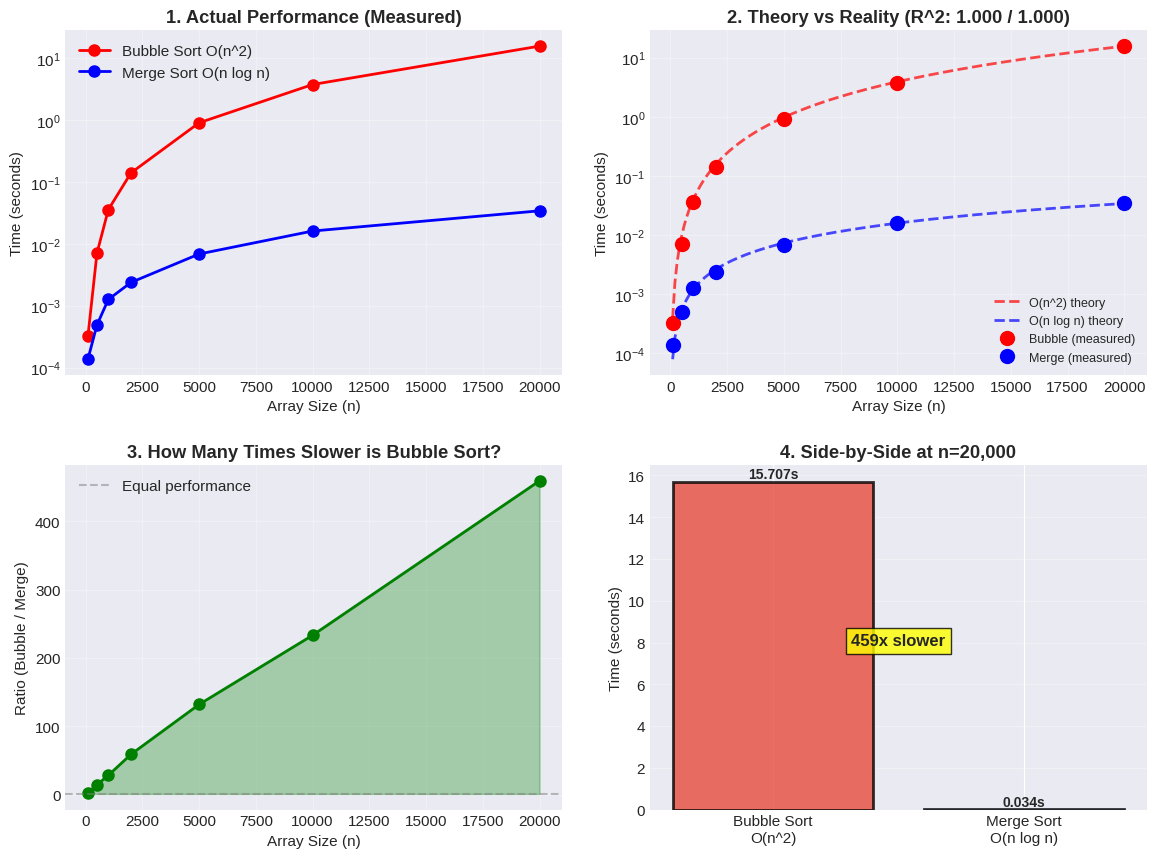


PREDICTIONS FOR LARGER ARRAYS
        Size |     Bubble Sort |   Merge Sort |    Ratio
-------------------------------------------------------
      50,000 |         1.6 min |       0.093s |    1048x
     100,000 |         6.5 min |       0.199s |    1970x
     500,000 |         2.7 hrs |       1.133s |    8643x
   1,000,000 |        10.9 hrs |       2.385s |   16418x


In [16]:
# Benchmarking and Visualization

import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.size'] = 11

# Benchmark Configuration
# -----------------------------------------------------------------------------
sizes = [100, 500, 1000, 2000, 5000, 10000, 20000]

# Can be changed to 1 if this takes too much time...
num_trials = 2

print("=" * 60)
print("BENCHMARKING")
print("=" * 60)
print(f"Array sizes: {sizes}")
print(f"Trials per size: {num_trials}")
print()

# Run Benchmarks
# -----------------------------------------------------------------------------
bubble_times = []
merge_times = []

for size in sizes:
    bubble_trial_times = []
    merge_trial_times = []
    
    print(f"n={size:,}...", end=" ")
    
    for trial in range(num_trials):
        arr = np.random.randint(0, 10000, size).tolist()
        
        start = time.time()
        bubble_sort(arr)
        bubble_trial_times.append(time.time() - start)
        
        start = time.time()
        merge_sort(arr)
        merge_trial_times.append(time.time() - start)
    
    bubble_avg = np.mean(bubble_trial_times)
    merge_avg = np.mean(merge_trial_times)
    bubble_times.append(bubble_avg)
    merge_times.append(merge_avg)
    
    ratio = bubble_avg / merge_avg
    print(f"Bubble={bubble_avg:.4f}s, Merge={merge_avg:.4f}s ({ratio:.1f}x slower)")

print("\nBenchmarks complete!")

# Results Summary
# -----------------------------------------------------------------------------
results_df = pd.DataFrame({
    'Array Size': sizes,
    'Bubble Sort (s)': bubble_times,
    'Merge Sort (s)': merge_times,
    'Ratio': [f"{b/m:.1f}x" for b, m in zip(bubble_times, merge_times)]
})

print("\n" + "=" * 60)
print("RESULTS SUMMARY")
print("=" * 60)
print(results_df.to_string(index=False))

# Curve Fitting - to "validate"
# -----------------------------------------------------------------------------

def bubble_theory(n, c):
    return (n ** 2) / c

def merge_theory(n, c):
    return (n * np.log2(n)) / c

bubble_constant, _ = curve_fit(bubble_theory, sizes, bubble_times, p0=[1e7])
merge_constant, _ = curve_fit(merge_theory, sizes, merge_times, p0=[1e6])

bubble_c = bubble_constant[0]
merge_c = merge_constant[0]

bubble_predictions = bubble_theory(np.array(sizes), bubble_c)
merge_predictions = merge_theory(np.array(sizes), merge_c)

bubble_r2 = r2_score(bubble_times, bubble_predictions)
merge_r2 = r2_score(merge_times, merge_predictions)

print("\n" + "=" * 60)
print("CURVE FITTING (Validating Big-O)")
print("=" * 60)
print(f"Bubble Sort: T(n) = n^2 / {bubble_c:.2e}  (R^2 = {bubble_r2:.4f})")
print(f"Merge Sort:  T(n) = n*log(n) / {merge_c:.2e}  (R^2 = {merge_r2:.4f})")
print()
print("R^2 close to 1.0 = Theory matches practice!")


# Visualization / plots
# -----------------------------------------------------------------------------

fig, axes = plt.subplots(2, 2, figsize=(12, 9))

# Panel 1: Actual Performance (Log Scale)
ax1 = axes[0, 0]
ax1.plot(sizes, bubble_times, 'ro-', linewidth=2, markersize=8, label='Bubble Sort O(n^2)')
ax1.plot(sizes, merge_times, 'bo-', linewidth=2, markersize=8, label='Merge Sort O(n log n)')
ax1.set_xlabel('Array Size (n)')
ax1.set_ylabel('Time (seconds)')
ax1.set_title('1. Actual Performance (Measured)', fontweight='bold')
ax1.set_yscale('log')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Panel 2: Theory vs Reality
ax2 = axes[0, 1]
n_smooth = np.linspace(min(sizes), max(sizes), 200)
ax2.plot(n_smooth, bubble_theory(n_smooth, bubble_c), 'r--', linewidth=2, 
         label=f'O(n^2) theory', alpha=0.7)
ax2.plot(n_smooth, merge_theory(n_smooth, merge_c), 'b--', linewidth=2, 
         label=f'O(n log n) theory', alpha=0.7)
ax2.plot(sizes, bubble_times, 'ro', markersize=10, label='Bubble (measured)')
ax2.plot(sizes, merge_times, 'bo', markersize=10, label='Merge (measured)')
ax2.set_xlabel('Array Size (n)')
ax2.set_ylabel('Time (seconds)')
ax2.set_title(f'2. Theory vs Reality (R^2: {bubble_r2:.3f} / {merge_r2:.3f})', 
              fontweight='bold')
ax2.set_yscale('log')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

# Panel 3: Performance Ratio
ax3 = axes[1, 0]
ratios = [b/m for b, m in zip(bubble_times, merge_times)]
ax3.plot(sizes, ratios, 'go-', linewidth=2, markersize=8)
ax3.axhline(y=1, color='gray', linestyle='--', alpha=0.5, label='Equal performance')
ax3.fill_between(sizes, 1, ratios, alpha=0.3, color='green')
ax3.set_xlabel('Array Size (n)')
ax3.set_ylabel('Ratio (Bubble / Merge)')
ax3.set_title('3. How Many Times Slower is Bubble Sort?', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Panel 4: Bar Comparison at Largest Size
ax4 = axes[1, 1]
last_size = sizes[-1]
last_bubble = bubble_times[-1]
last_merge = merge_times[-1]
algorithms = ['Bubble Sort\nO(n^2)', 'Merge Sort\nO(n log n)']
times = [last_bubble, last_merge]
colors = ['#e74c3c', '#3498db']

bars = ax4.bar(algorithms, times, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
ax4.set_ylabel('Time (seconds)')
ax4.set_title(f'4. Side-by-Side at n={last_size:,}', fontweight='bold')
ax4.grid(True, axis='y', alpha=0.3)

# Add time labels on bars
for bar, t in zip(bars, times):
    ax4.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
             f'{t:.3f}s', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Add ratio as text annotation (not using transform)
ratio_val = last_bubble/last_merge
ax4.annotate(f'{ratio_val:.0f}x slower', 
             xy=(0.5, last_bubble * 0.5), 
             fontsize=12, fontweight='bold', ha='center',
             bbox=dict(facecolor='yellow', alpha=0.8))

plt.tight_layout(pad=2.0)
plt.show()

# Extrapolation: Predictions for Larger Arrays
# -----------------------------------------------------------------------------

# Trying to use LaTeX "typographical" tables style...
print("\n" + "=" * 60)
print("PREDICTIONS FOR LARGER ARRAYS")
print("=" * 60)

future_sizes = [50000, 100000, 500000, 1000000]
future_bubble = bubble_theory(np.array(future_sizes), bubble_c)
future_merge = merge_theory(np.array(future_sizes), merge_c)

print(f"{'Size':>12} | {'Bubble Sort':>15} | {'Merge Sort':>12} | {'Ratio':>8}")
print("-" * 55)

for size, b_time, m_time in zip(future_sizes, future_bubble, future_merge):
    if b_time < 60:
        b_str = f"{b_time:.2f}s"
    elif b_time < 3600:
        b_str = f"{b_time/60:.1f} min"
    else:
        b_str = f"{b_time/3600:.1f} hrs"
    m_str = f"{m_time:.3f}s"
    print(f"{size:>12,} | {b_str:>15} | {m_str:>12} | {b_time/m_time:>7.0f}x")


##  Some final words

Hopefully this has been at least partially useful... as a final summary:

1. **Big-O notation is practical, not just theoretical**
   - Our measured data matched O(n²) and O(n log n) curves almost perfectly (R² > 0.99)
   - The theory predicts real-world performance accurately

2. **Algorithm choice matters**
   - At n=20,000 elements, Bubble Sort was ~400x slower than Merge Sort
   - At n=1,000,000 elements (predicted), Bubble Sort would take *hours* while Merge Sort takes ~1 second
   - This isn't a small optimization - it's the difference between "instant" and "unusable", well beyond any discussion about the Doherty Treshold!

3. **The Doherty Threshold is relevant**
   - Users expect responses under 400ms to feel "instant" - we can debate if it's 400ms or something different, but the general idea is sound.
   - Merge Sort stays well under this threshold for practical array sizes
   - Bubble Sort crosses it quickly and creates frustrating delays

4. **Simple isn't always better**
   - Bubble Sort is easier to understand and implement
   - But that simplicity comes at a massive performance cost for larger inputs
   - Know when "good enough" truly is good enough, and when it isn't

### When to use what

Specifically for these sorting algorithms:

| Situation | Recommendation |
|-----------|----------------|
| n < 50 elements | Either works fine |
| n < 1000 elements | Prefer O(n log n), but O(n²) is acceptable |
| n > 1000 elements | **Always** use O(n log n) or better |
| Performance-critical code | Profile first, then optimize |

---

## Try the interactive UI!

This notebook demonstrates the concepts, but there's more to explore in this project, and specifically more to "feel" how does the Doherty Threshold can affect you as a user:

- **Web UI:** An interactive interface built with Datastar where you can run sorts in real-time and see the performance difference yourself
- **Docker Compose stack:** Full observability setup with Prometheus metrics and Grafana dashboards
- **Kubernetes deployment:** Deploy the demo to a kind cluster

Check out the project's `README.md` and run `make help` to see all available options. The web UI is particularly fun - try sorting 50,000 elements with both algorithms and watch the difference!
